In [1]:
!gdown --id 1y-GbImuFa9WrymK9qIdglTVjfoAhPMCW

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1y-GbImuFa9WrymK9qIdglTVjfoAhPMCW
To: /content/stock_market_data.csv
100% 694k/694k [00:00<00:00, 106MB/s]


In [3]:
ls

sample_data/  stock_market_data.csv


In [4]:
import pandas as pd
stock_market_data = pd.read_csv('stock_market_data.csv')

In [5]:
stock_market_data['Symbol'].unique()

array(['AMZN', 'FB', 'TSLA', 'GOOGL', 'AAPL'], dtype=object)

In [6]:
stock_market_data.describe(include="all")

,Date,Symbol,Open,Volume
count,15595,15595,15595.000000,1.559500e+04
unique,3119,5,NaN,NaN
top,2009-12-31,AMZN,NaN,NaN
freq,5,3119,NaN,NaN
mean,NaN,NaN,473.161081,8.834204e+07
std,NaN,NaN,741.601586,1.722711e+08
min,NaN,NaN,3.228000,4.656000e+05
25%,NaN,NaN,42.049999,3.709750e+06
50%,NaN,NaN,158.070007,1.633090e+07
75%,NaN,NaN,561.494995,7.875115e+07


In [7]:
stock_market_data

,Date,Symbol,Open,Volume
0,2009-12-31,AMZN,136.250000,7599900.0
1,2010-01-04,AMZN,136.250000,7599900.0
2,2010-01-05,AMZN,133.429993,8851900.0
3,2010-01-06,AMZN,134.600006,7178800.0
4,2010-01-07,AMZN,132.009995,11030200.0
...,...,...,...,...
15590,2022-05-09,AAPL,154.929993,131577900.0
15591,2022-05-10,AAPL,155.520004,115366700.0
15592,2022-05-11,AAPL,153.500000,142689800.0
15593,2022-05-12,AAPL,142.770004,182602000.0


In [8]:
class User:
    def __init__(self, name, surname, national_number, date_of_birth, balance):
        self.name = name
        self.surname = surname
        self.national_number = national_number
        self.date_of_birth = date_of_birth
        self.balance = balance

In [9]:
new_user = User("John", "Doe", "123456789", "01-01-1990", 10000)

In [10]:
class Portfolio:
    def __init__(self):
        self.stocks = {}

    def get_stock_info(self, ticker, date):
        stock_data = stock_market_data[(stock_market_data['Symbol'] == ticker) & (stock_market_data['Date'] == date)].iloc[0]
        return stock_data

    def buy_stock(self, ticker, quantity, user, date):
        stock_info = self.get_stock_info(ticker, date)
        stock_price = stock_info['Open']
        total_cost = stock_price * quantity

        if user.balance >= total_cost:
            user.balance -= total_cost
            if ticker in self.stocks:
                self.stocks[ticker] += quantity
            else:
                self.stocks[ticker] = quantity
            return True
        else:
            return False

    def sell_stock(self, ticker, quantity, user, date):
        if ticker in self.stocks and self.stocks[ticker] >= quantity:
            stock_info = self.get_stock_info(ticker, date)
            stock_price = stock_info['Open']
            total_earned = stock_price * quantity

            user.balance += total_earned
            self.stocks[ticker] -= quantity

            if self.stocks[ticker] == 0:
                del self.stocks[ticker]
            print("It is available based on your asset")
        else:
            print("It is not available based on your asset | ", "your asset is : ", self.stocks[ticker], " your demand to sell is : ",quantity)

    def view_stocks(self, date):
        stock_data = []
        for ticker, quantity in self.stocks.items():
            stock_info = self.get_stock_info(ticker, date)
            stock_price = stock_info['Open']
            stock_data.append((ticker, stock_price, quantity))

        return pd.DataFrame(stock_data, columns=['Ticker', 'Price', 'Quantity'])

    def total_value(self, date):
        value = 0
        for ticker, quantity in self.stocks.items():
            stock_info = self.get_stock_info(ticker, date)
            stock_price = stock_info['Open']
            value += stock_price * quantity
        return value


    Buy a share with your account balance


In [11]:
# Create a user and a portfolio
user1 = User("John", "Doe", "123456789", "01-01-1990", 10000)
portfolio1 = Portfolio()

# Buy 10 shares of AAPL on 2010-01-04
date_buy = '2010-01-04'
portfolio1.buy_stock("AAPL", 10, user1, date_buy)

True

In [12]:
portfolio1.buy_stock("AMZN", 30, user1, date_buy)

True

In [13]:
portfolio1.buy_stock("TSLA", 100, user1, date_buy)

True


    Selling the share we have in our portfolio


In [14]:
# Sell 5 shares of AAPL on 2022-05-13
date_sell = '2022-05-13'
portfolio1.sell_stock("AAPL", 15, user1, date_sell)

It is not available based on your asset |  your asset is :  10  your demand to sell is :  15


In [15]:
# Sell 15 shares of AAPL on 2022-05-13
date_sell = '2022-05-13'
portfolio1.sell_stock("TSLA", 99, user1, date_sell)

It is available based on your asset


In [16]:
# Sell 15 shares of AAPL on 2022-05-13
date_sell = '2022-05-13'
portfolio1.sell_stock("AMZN", 5, user1, date_sell)

It is available based on your asset



    Viewing the list of available shares with their price change percentage (in descending order)

To calculate the price change percentage, you can create a new DataFrame with the latest available data for each stock. Then, sort the DataFrame in descending order based on the price change percentage.

In [17]:
def available_shares():
    unique_stocks = stock_market_data['Symbol'].unique()
    latest_data = []

    for stock in unique_stocks:
        latest_stock_data = stock_market_data[stock_market_data['Symbol'] == stock].iloc[-1]
        open_price = latest_stock_data['Open']
        prev_open_price = stock_market_data[stock_market_data['Symbol'] == stock].iloc[-2]['Open']
        price_change_percent = ((open_price - prev_open_price) / prev_open_price) * 100
        latest_data.append([latest_stock_data['Date'], stock, open_price, price_change_percent])

    available_stocks = pd.DataFrame(latest_data, columns=['Date', 'Symbol', 'Open', 'Price Change %'])
    available_stocks = available_stocks.sort_values(by='Price Change %', ascending=False)
    return available_stocks

print(available_shares())

         Date Symbol         Open  Price Change %
2  2022-05-13   TSLA   773.479980       10.339512
0  2022-05-13   AMZN  2181.379883        6.149873
1  2022-05-13     FB   192.580002        2.950927
3  2022-05-13  GOOGL  2290.659912        2.833151
4  2022-05-13   AAPL   144.589996        1.274772



    View the purchased shares and the total value of your shares


In [18]:
# View purchased shares
print(portfolio1.view_stocks(date_sell))
print("*"*30)
# View total value of shares
print("Total Value:", portfolio1.total_value(date_sell))

  Ticker        Price  Quantity
0   AAPL   144.589996        10
1   AMZN  2181.379883        25
2   TSLA   773.479980         1
******************************
Total Value: 56753.877014160156



    Select a share and view its price change chart

To view the price change chart for a specific share, you can use the matplotlib library.

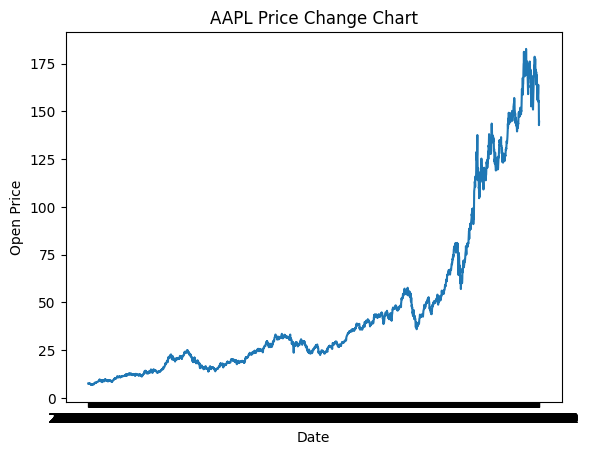

In [19]:
import matplotlib.pyplot as plt

def plot_price_change_chart(ticker):
    stock_data = stock_market_data[stock_market_data['Symbol'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Open'])
    plt.xlabel('Date')
    plt.ylabel('Open Price')
    plt.title(f'{ticker} Price Change Chart')
    plt.show()

# Plot the price change chart for AAPL
plot_price_change_chart("AAPL")

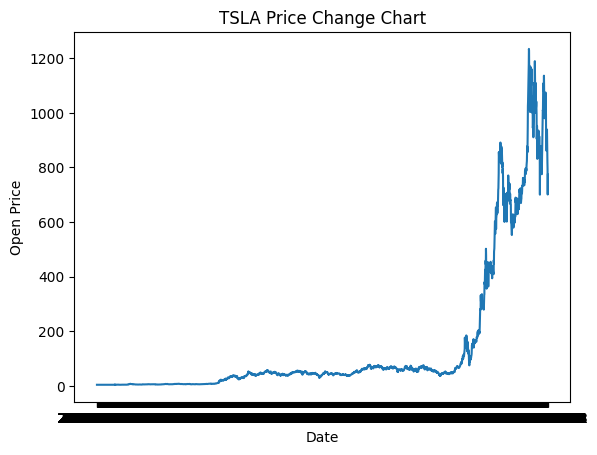

In [20]:
plot_price_change_chart("TSLA")

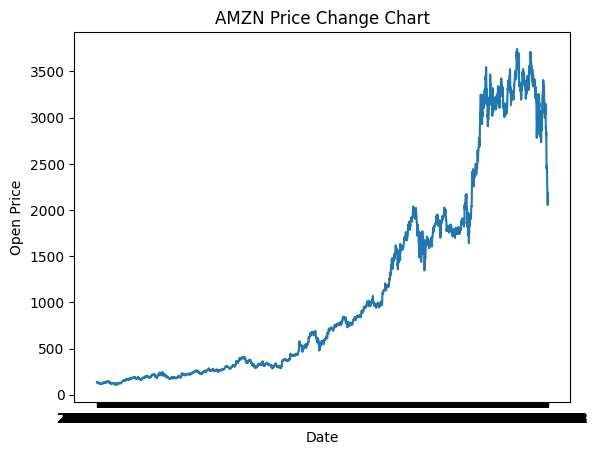

In [21]:
plot_price_change_chart("AMZN")


    Seeing the general trend of price changes using linear regression

To visualize the general trend of price changes using linear regression, you can use the seaborn library.

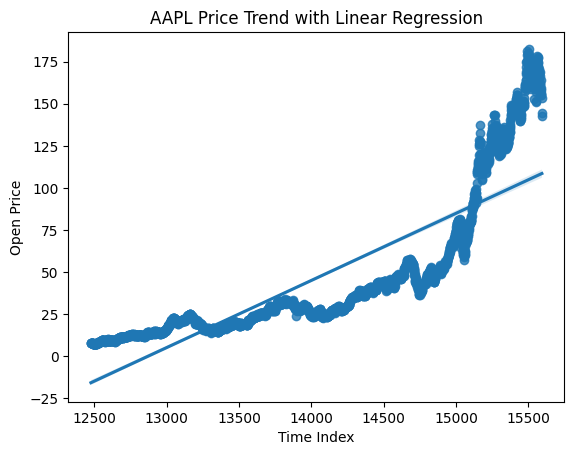

In [22]:
import seaborn as sns

def plot_price_trend(ticker):
    stock_data = stock_market_data[stock_market_data['Symbol'] == ticker]
    sns.regplot(x=stock_data.index, y=stock_data['Open'])
    plt.xlabel('Time Index')
    plt.ylabel('Open Price')
    plt.title(f'{ticker} Price Trend with Linear Regression')
    plt.show()

# Plot the price trend with linear regression for AAPL
plot_price_trend("AAPL")

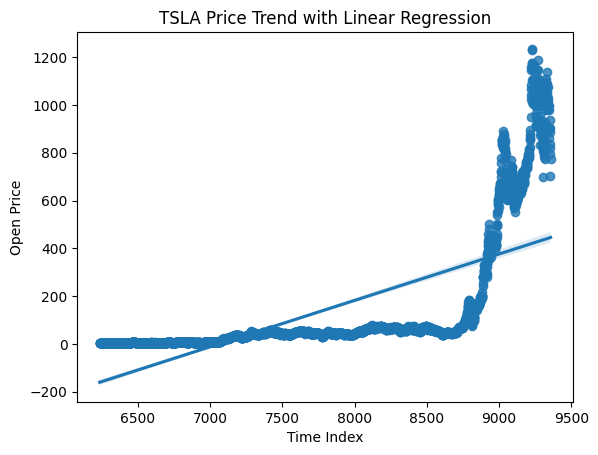

In [23]:
plot_price_trend("TSLA")

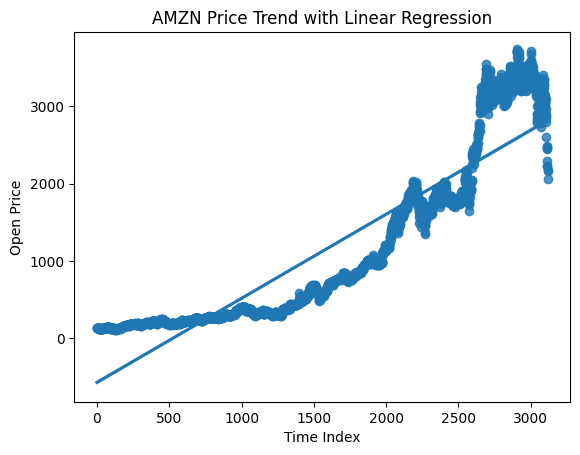

In [24]:
plot_price_trend("AMZN")